# CS 636: Assignment 2

## by Derek Jones

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage as sk

from utils import *

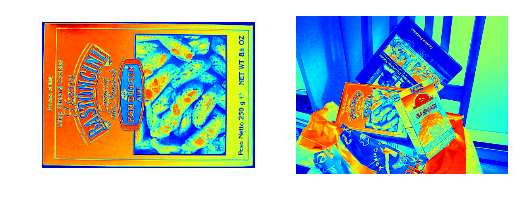

In [11]:
img1 = cv2.imread('box.png',0)
img2 = cv2.imread('box_in_scene.png',0)



f, subp = plt.subplots(nrows = 1, ncols = 2)

subp[0].imshow(img1)
subp[0].axis('off')
subp[1].imshow(img2)
subp[1].axis('off')
plt.show()

## Keypoints and descriptors

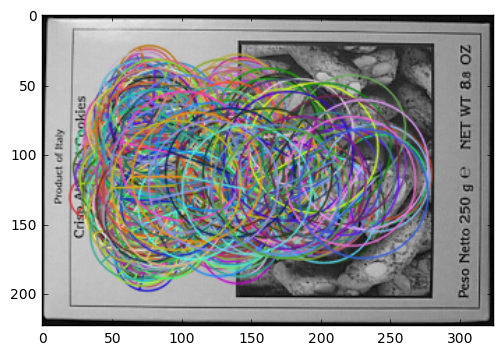

In [12]:
orb = cv2.ORB_create()

# keypoints and descriptors

kp1 = orb.detect(img1)
kp1, des1 = orb.compute(img1, kp1)
img1_2 = cimg=cv2.drawKeypoints(img1,kp1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img1_2)
plt.show()


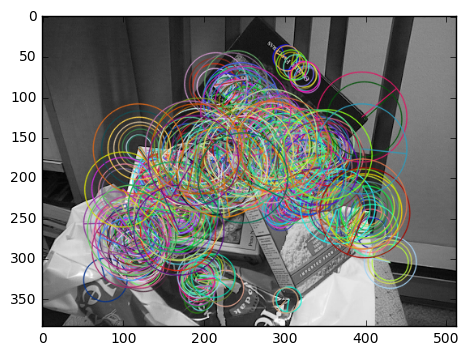

In [13]:
kp2 = orb.detect(img2)
kp2, des2 = orb.compute(img2, kp2)
img2_2 = cimg=cv2.drawKeypoints(img2,kp2,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img2_2)
plt.show()

## Feature Matching

In [14]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
#matches = bf.knnMatch(des1,des2,k=1)
matches = bf.match(des1,des2)





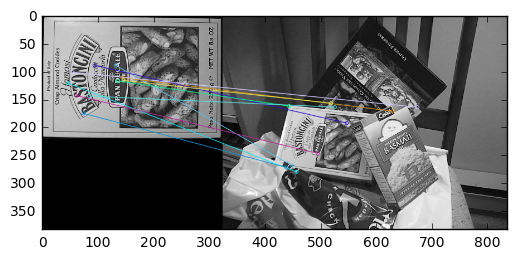

In [15]:

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=2)

plt.imshow(img3)
plt.show()